# 필요한 모듈 import하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
%matplotlib inline

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 데이터 준비

In [2]:
digits = load_digits()
print(dir(digits))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


# 데이터 이해하기

In [3]:
digits_data = digits.data
print(digits_data.shape)

(1797, 64)


In [4]:
digits_data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
digits_label = digits.target
print(digits_label.shape)

(1797,)


In [6]:
digits_label

array([0, 1, 2, ..., 8, 9, 8])

# train, test 데이터 분리

In [7]:
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))

X_train 개수:  1437 , X_test 개수:  360


# 다양한 모델로 학습시켜보기

In [8]:
from sklearn.metrics import confusion_matrix      #모델 평가용

## 1. Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360



### Decision Tree 분석

[[42  0  0  1  0  0  0  0  0  0]
 [ 0 34  3  1  0  1  1  0  0  2]
 [ 0  0 33  2  0  0  1  1  2  1]
 [ 0  1  0 31  0  0  0  0  1  1]
 [ 0  0  1  0 35  0  0  0  1  0]
 [ 0  1  0  0  0 27  0  0  0  0]
 [ 0  0  0  0  2  0 26  0  0  0]
 [ 0  0  0  1  2  1  0 27  0  2]
 [ 0  5  4  1  1  0  3  0 28  1]
 [ 0  1  1  2  2  1  0  0  0 25]]
------------------------------


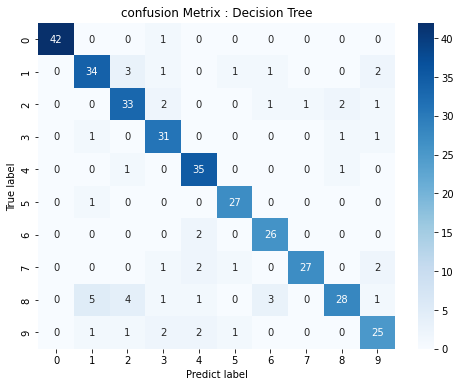

In [10]:
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('-'*30)
sns.heatmap(cm, cmap="Blues", annot=True, fmt='d')
plt.title("confusion Metrix : Decision Tree")
plt.ylabel("True label")
plt.xlabel("Predict label")
plt.show()

### 2. Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       0.93      1.00      0.96        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       1.00      0.84      0.91        43
           9       0.94      0.94      0.94        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360



### Random Forest 분석

[[42  0  0  0  1  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  0  0]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  0 27  0  0  0  1]
 [ 0  0  0  0  1  0 27  0  0  0]
 [ 0  0  0  0  0  0  0 32  0  1]
 [ 0  3  0  0  1  1  0  2 36  0]
 [ 0  0  0  0  0  2  0  0  0 30]]
------------------------------


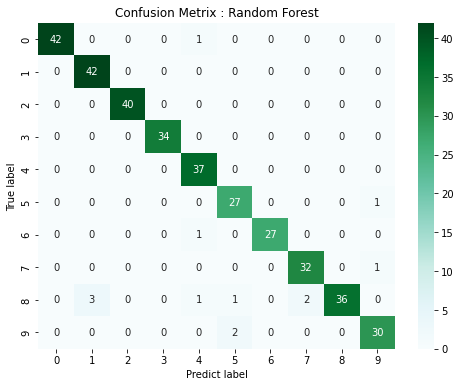

In [12]:
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('-'*30)
sns.heatmap(cm, cmap="BuGn", annot=True, fmt='d')
plt.title("Confusion Metrix : Random Forest")
plt.ylabel("True label")
plt.xlabel("Predict label")
plt.show()

### 3. SVM

In [13]:
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



### SVM 분석

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  0  0]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  0 28  0  0  0  0]
 [ 0  0  0  0  0  0 28  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  0]
 [ 0  2  0  0  0  1  0  0 40  0]
 [ 0  0  0  0  0  1  0  0  0 31]]
------------------------------


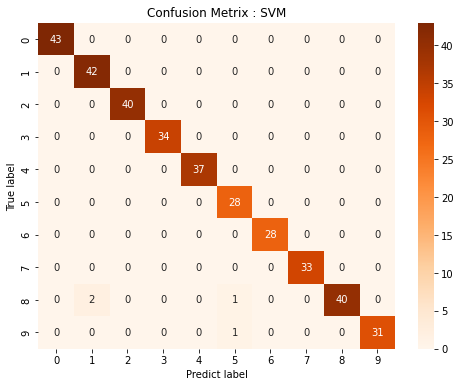

In [14]:
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('-'*30)
sns.heatmap(cm, cmap="Oranges", annot=True, fmt='d')
plt.title("Confusion Metrix : SVM")
plt.ylabel("True label")
plt.xlabel("Predict label")
plt.show()

### 4. SGD Classifier

In [15]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.89      0.93      0.91        42
           2       0.98      1.00      0.99        40
           3       1.00      0.85      0.92        34
           4       0.95      1.00      0.97        37
           5       0.93      0.96      0.95        28
           6       1.00      0.93      0.96        28
           7       0.94      0.97      0.96        33
           8       0.88      0.84      0.86        43
           9       0.86      0.94      0.90        32

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



### SGD Classifier 분석

[[42  0  0  0  1  0  0  0  0  0]
 [ 0 39  0  0  0  0  0  0  1  2]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  1  0  1  2  1]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  0 27  0  0  0  1]
 [ 0  1  0  0  0  0 26  0  1  0]
 [ 0  0  0  0  0  0  0 32  0  1]
 [ 0  4  1  0  1  0  0  1 36  0]
 [ 0  0  0  0  0  1  0  0  1 30]]
------------------------------


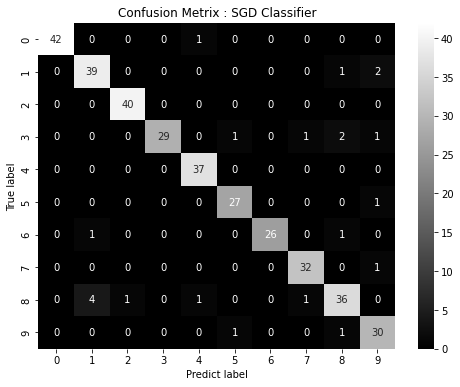

In [16]:
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('-'*30)
sns.heatmap(cm, cmap="gray", annot=True, fmt='d')
plt.title("Confusion Metrix : SGD Classifier")
plt.ylabel("True label")
plt.xlabel("Predict label")
plt.show()

### 5. Logistic Regression 

In [17]:
#데이터 세트가 작아서 생기는 오류
from sklearn.linear_model import LogisticRegression

logist_model = LogisticRegression(max_iter=500,         #에포크 = 얼마나 교육 시킬컷인지랑 비슷
                                 solver='liblinear')    #계산되는 방법   ['l1','l2'] otimization
logist_model.fit(X_train, y_train)
y_pred = logist_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.90      0.90      0.90        42
           2       0.97      0.97      0.97        40
           3       0.86      0.94      0.90        34
           4       0.95      0.97      0.96        37
           5       0.93      1.00      0.97        28
           6       0.96      0.93      0.95        28
           7       0.97      0.97      0.97        33
           8       0.93      0.88      0.90        43
           9       0.97      0.88      0.92        32

    accuracy                           0.94       360
   macro avg       0.95      0.95      0.94       360
weighted avg       0.95      0.94      0.94       360



### Logistic Regression 분석

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 38  0  2  0  1  0  0  0  1]
 [ 0  0 39  1  0  0  0  0  0  0]
 [ 0  0  0 32  0  0  0  1  1  0]
 [ 0  0  0  0 36  0  1  0  0  0]
 [ 0  0  0  0  0 28  0  0  0  0]
 [ 0  1  0  0  0  0 26  0  1  0]
 [ 0  0  0  0  1  0  0 32  0  0]
 [ 0  3  1  0  1  0  0  0 38  0]
 [ 0  0  0  2  0  1  0  0  1 28]]
------------------------------


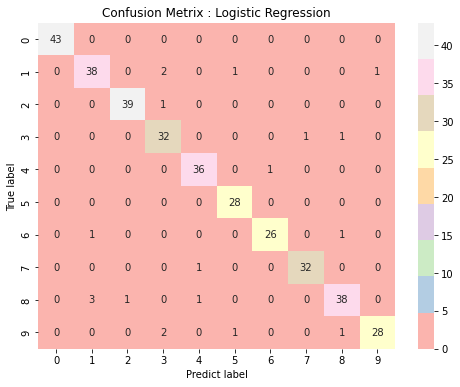

In [18]:
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('-'*30)
sns.heatmap(cm, cmap="Pastel1", annot=True, fmt='d')
plt.title("Confusion Metrix : Logistic Regression")
plt.ylabel("True label")
plt.xlabel("Predict label")
plt.show()

# 모델 평가 결론

손글씨를 분류하는 것은 모델이 얼마나 정확하게 맞추었는지가 중요하다. 그래서 precision 값이 중요하다.

1. **Decision Tree  :** 2 ~ 6번까지 Recall값이 Precision 값보다 큰 것을 보아 글씨가 틀렸는데 맞다고 하는 경우가 많다는 것을 알 수 있었다. 다른 모델에 비해 정확도가 낮아서 손글씨를 분류하는데 적합하지않은 모델이다.


2. **Random Forest :** f1-score 값이 Decision Tree보다 높은 것을 보아 Decision Tree보다는 좋은 모델이지만 SVM모델보다는 부족한 모델이다. 1, 4, 7 번을 제외하고 예측률이 높은 것을 확인할 수 있다.


3. **SVM :** 다른 모델들과 비교해서 월등히 뛰어난 성능을 자랑한다. 1, 5, 8, 9번을 제외한 나머지 5개의 항목에서 100% 정확도를 달성했고 정밀도도 2, 5번 항목을 제외하고는 만점에 가까운 precision 값을 얻었다. 그리고 SVM 모델은 이진분류뿐만 아니라 다중 분류에도 사용이 가능하다. 그래서 손글씨를 분류하는 모델로 가장 적합하다.


4. **SGD Classifier :** precision값이 중요한 분류에서 recall 값이 더 좋게 나온 것을 보아 모델이 틀린 것도 정답이라고 하는 경우가 발견된다. 그래서 이 모델은 적합하지않다.


5. **Logistic Regression :** max_iter=500,         #에포크 = 얼마나 교육 시킬컷인지랑 비슷
                                 solver='liblinear'   데이터 세트가 작아서 생기는 오류를 해결하기위해 넣어줘야한다. f1-score 값이 잘
                                 나오긴 했으나 SVM 모델이 더 잘나왔기 때문에 SVM모델이 오류가 생기면 사용할만한 대체용 모델이 될듯하
                                 다.
                                 
                                 